# 1 关联图correlation

## 1.4&1.5 抖动图与计数图

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('http://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')

In [3]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


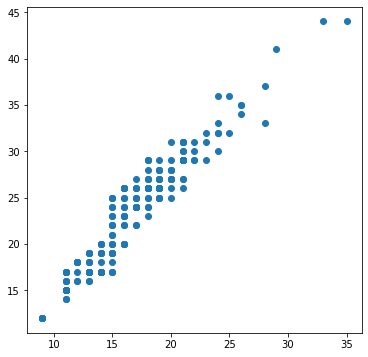

In [4]:
plt.figure(figsize = (6,6))
plt.scatter(df.cty, df.hwy)

In [5]:
df.shape #图上不是234个点

(234, 11)

In [6]:
df.loc[:,['cty','hwy']] #有很多横纵坐标一致的点

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26
...,...,...
229,19,28
230,21,29
231,16,26
232,18,26


有两种手段可以解决这个问题，抖动图与计数图，两种都使用sns.stripplot()进行绘制。<br>重要参数jitter：抖动的幅度，即同一位置的两个点的距离大小，0表示完全不存在抖动。

### 1.4.1 抖动图

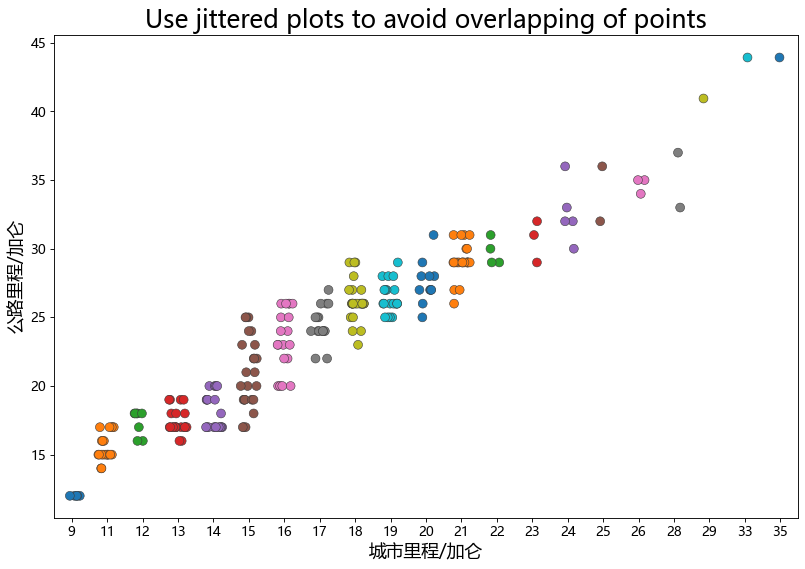

In [7]:
#建立画布
fig, ax = plt.subplots(figsize = (12,8), dpi = 80)

#绘制抖动图
sns.stripplot(df.cty, df.hwy
             ,jitter = 0.25 #抖动的幅度，点与点之间的距离
             ,size = 8 #点的尺寸
             ,ax = ax #子图
             ,linewidth = 0.5 #线的宽度
             ,palette = 'tab10' #颜色
             )

#装饰
plt.title('Use jittered plots to avoid overlapping of points', fontsize = 22)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.xlabel('城市里程/加仑', fontsize = 16)
plt.ylabel('公路里程/加仑', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

### 1.4.2 计数图

处理数据

In [8]:
df.groupby(['hwy', 'cty']).size() #以hwy和cty为主键，取出来的所有类别，size是聚合函数

hwy  cty
12   9       5
14   11      2
15   11     10
16   11      3
     12      2
            ..
36   25      1
37   28      1
41   29      1
44   33      1
     35      1
Length: 78, dtype: int64

In [9]:
df.groupby(['hwy', 'cty']).count() #除空值外，每个特征都计数

manufacturer  model  displ  year  cyl  trans  drv  fl  class
hwy cty                                                              
12  9               5      5      5     5    5      5    5   5      5
14  11              2      2      2     2    2      2    2   2      2
15  11             10     10     10    10   10     10   10  10     10
16  11              3      3      3     3    3      3    3   3      3
    12              2      2      2     2    2      2    2   2      2
...               ...    ...    ...   ...  ...    ...  ...  ..    ...
36  25              1      1      1     1    1      1    1   1      1
37  28              1      1      1     1    1      1    1   1      1
41  29              1      1      1     1    1      1    1   1      1
44  33              1      1      1     1    1      1    1   1      1
    35              1      1      1     1    1      1    1   1      1

[78 rows x 9 columns]

In [10]:
df.groupby(['hwy', 'cty']).size().reset_index()

,hwy,cty,0
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2
...,...,...,...
73,36,25,1
74,37,28,1
75,41,29,1
76,44,33,1


In [11]:
df.groupby(['hwy', 'cty']).size().reset_index(name = 'counts') #name参数：用于原始Series里面本来是value 的那些值的列名

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2
...,...,...,...
73,36,25,1
74,37,28,1
75,41,29,1
76,44,33,1


In [12]:
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name = 'counts')

In [13]:
df_counts.head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


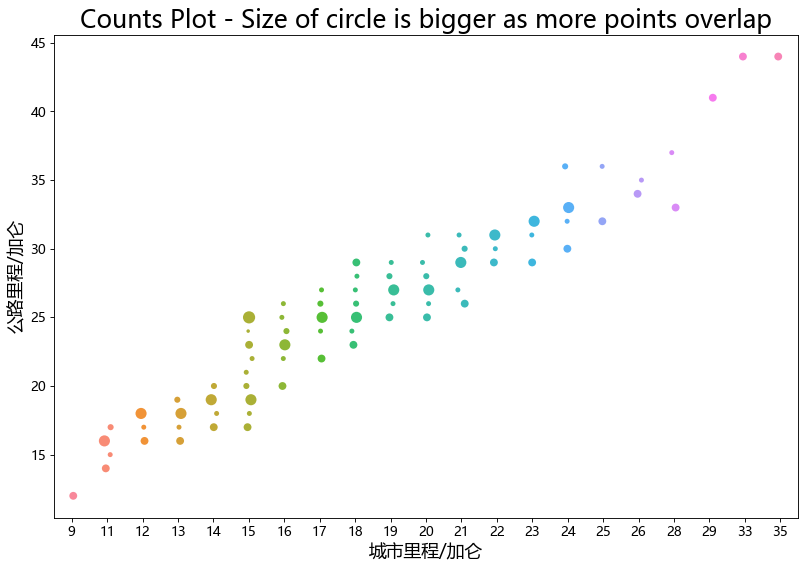

In [14]:
#建立画布
fig, ax = plt.subplots(figsize = (12,8), dpi = 80)

#绘制抖动图
sns.stripplot(df_counts.cty #横坐标
             ,df_counts.hwy #纵坐标
             ,sizes = df_counts.counts*10 #点的尺寸
             ,ax = ax #子图
             #,palette = 'tab10' #颜色
             )

#装饰
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize = 22)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.xlabel('城市里程/加仑', fontsize = 16)
plt.ylabel('公路里程/加仑', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()